# Loading data into machine learning

In this notebook, we will look at the necessary steps required before any machine learning takes place.
* load the data
* look at the variables in the dataset, in particular, differentiate
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows
* visualize the distribution of the variables to gain some insights into the dataset

## Loading the adult census dataset

We will use data from the "Current Population adult_census" from 1994 that we
downloaded from [OpenML](http://openml.org/).

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")

We can look at the OpenML webpage to learn more about this dataset: http://www.openml.org/d/1590

The goal with this data is to predict whether a person earns over 50K a year
from heterogeneous data such as age, employment, education, family
information, etc.

## The variables (columns) in the dataset

The data are stored in a pandas dataframe.

Pandas is a Python library to manipulate tables, a bit like Excel but programming: https://pandas.pydata.org/

In [2]:
adult_census.head()  # Look at the first few lines of our dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The column named **class** is our target variable (i.e., the variable which
we want to predict). The two possible classes are `<= 50K` (low-revenue) and
`> 50K` (high-revenue). The resulting prediction problem is therefore a binary
classification problem,
while we will use the other columns as input variables for our model.

In [3]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

Note: classes are slightly imbalanced. Class imbalance happens often in
practice and may need special techniques for machine learning. For example in
a medical setting, if we are trying to predict whether patients will develop
a rare disease, there will be a lot more healthy patients than ill patients in
the dataset.

The dataset contains both numerical and categorical data. Numerical values
can take continuous values for example `age`. Categorical values can have a
finite number of values, for example `native-country`.

In [4]:
numerical_columns = [
    'age', 'education-num', 'capital-gain', 'capital-loss',
    'hours-per-week']
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country']
all_columns = numerical_columns + categorical_columns + [
    target_column]

adult_census = adult_census[all_columns]

Note that for simplicity, we have ignored the "fnlwgt" (final weight) column
that was crafted by the creators of the dataset when sampling the dataset to
be representative of the full census database.

We can check the number of samples and the number of features available in
the dataset:

In [5]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} features")

The dataset contains 48842 samples and 14 features


## Visual inspection of the data
Before building a machine learning model, it is a good idea to look at the
data:
* maybe the task you are trying to achieve can be solved without machine
  learning
* you need to check that the information you need for your task is indeed present in
the dataset
* inspecting the data is a good way to find peculiarities. These can
  arise during data collection (for example, malfunctioning sensor or missing
  values), or from the way the data is processed afterwards (for example capped
  values).

Let's look at the distribution of individual variables, to get some insights
about the data. We can start by plotting histograms, note that this only
works for numerical variables:

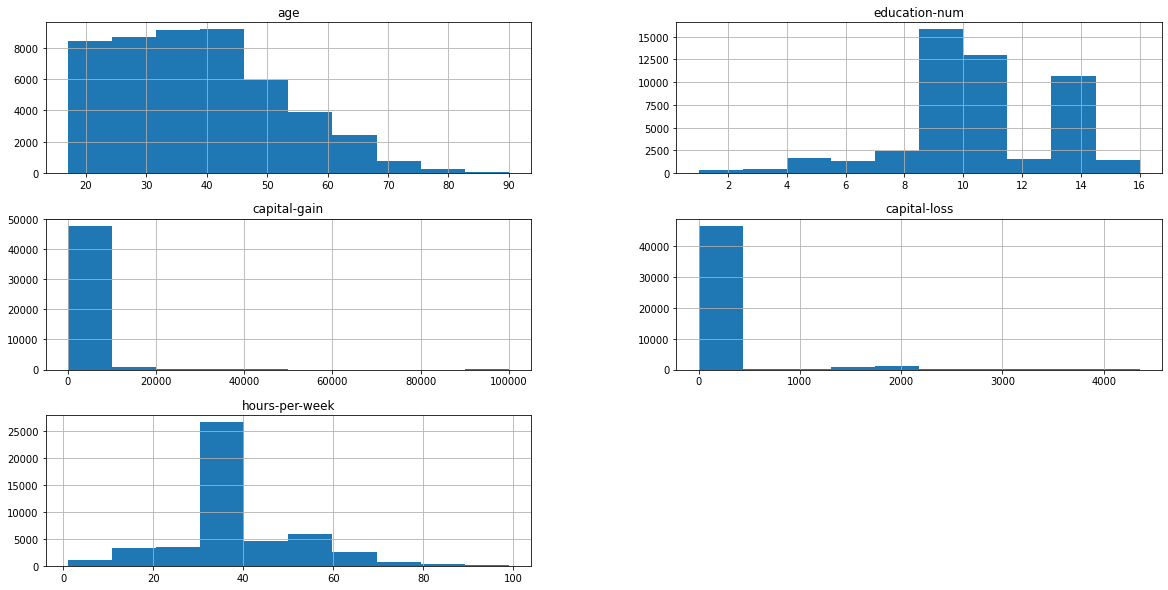

In [6]:
_ = adult_census.hist(figsize=(20, 10))

We can already make a few comments about some of the variables:
* age: there are not that many points for 'age > 70'. The dataset description
does indicate that retired people have been filtered out (`hours-per-week > 0`).
* education-num: peak at 10 and 13, hard to tell what it corresponds to
without looking much further. We'll do that later in this notebook.
* hours per week peaks at 40, this was very likely the standard number of
working hours at the time of the data collection
* most values of capital-gain and capital-loss are close to zero

For categorical variables, we can look at the distribution of values:

In [7]:
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [8]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

`pandas_profiling` is a nice tool for inspecting the data (both numerical and
categorical variables).

In [9]:
import pandas_profiling
adult_census.profile_report()

As noted above, `education-num` distribution has two clear peaks around 10
and 13. It would be reasonable to expect that `education-num` is the number of
years of education.

Let's look at the relationship between `education` and `education-num`.

In [10]:
pd.crosstab(index=adult_census['education'],
            columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that education and education-num gives you the same information.
For example, `education-num=2` is equivalent to `education='1st-4th'`. In
practice that means we can remove `education-num` without losing information.
Note that having redundant (or highly correlated) columns can be a problem
for machine learning algorithms.

Another way to inspect the data is to do a pairplot and show how each variable
differs according to our target, `class`. Plots along the diagonal show the
distribution of individual variables for each `class`. The plots on the
off-diagonal can reveal interesting interactions between variables.

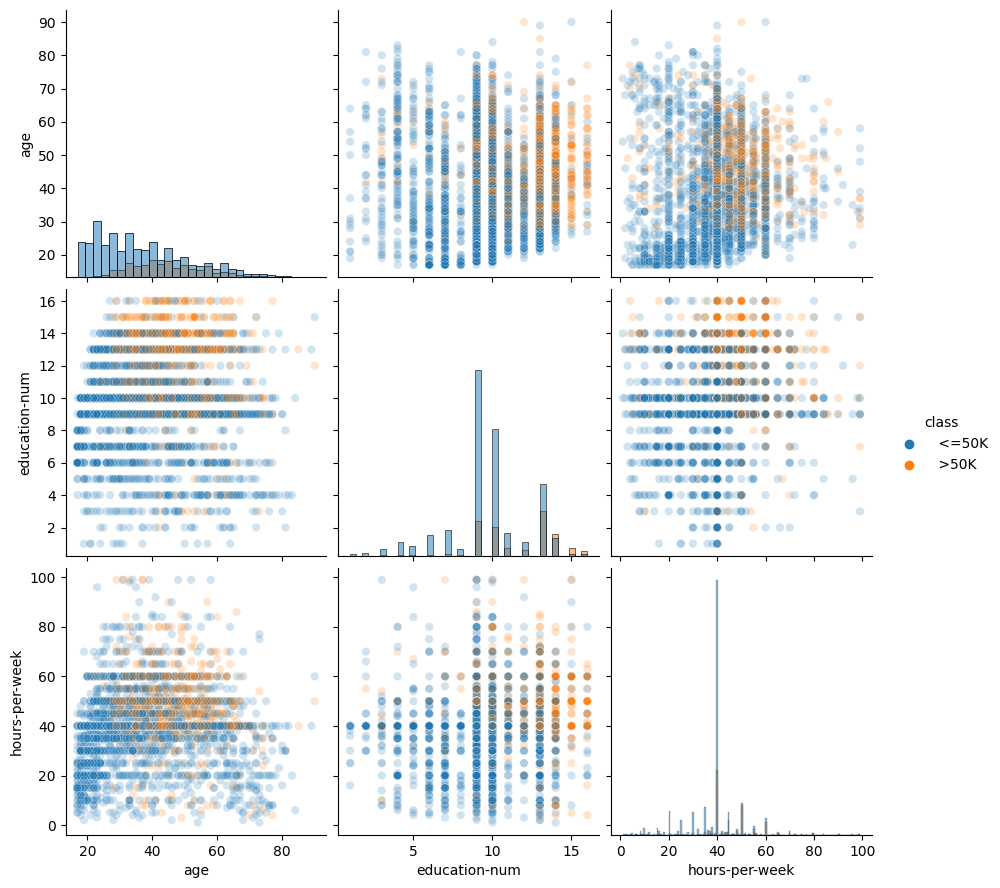

In [11]:
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']

# reset the plotting style
import matplotlib.pyplot as plt
plt.rcdefaults()

import seaborn as sns
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist')

By looking at the data you could infer some hand-written rules to predict the
class:
* if you are young (less than 25 year-old roughly), you are in the `<= 50K` class.
* if you are old (more than 70 year-old roughly), you are in the `<= 50K` class.
* if you work part-time (less than 40 hours roughly) you are in the `<= 50K` class.

These hand-written rules could work reasonably well without the need for any
machine learning. Note however that it is not very easy to create rules for
the region `40 < hours-per-week < 60` and `30 < age < 70`. We can hope that
machine learning can help in this region. Also note that visualization can
help creating hand-written rules but is limited to 2 dimensions (maybe 3
dimensions), whereas machine learning models can build models in
high-dimensional spaces.

Another thing worth mentioning in this plot: if you are young (less than 25
year-old roughly) or old (more than 70 year-old roughly) you tend to work
less. This is a non-linear relationship between age and hours
per week. Linear machine learning models can only capture linear interactions, so
this may be a factor when deciding which model to chose.

In a machine-learning setting, an algorithm automatically
create the "rules" in order to make predictions on new data.

The plot below shows the rules of a simple model, called decision tree.
We will explain how this model works in a latter notebook, for now let us
just consider the model predictions when trained on this dataset:

![](../figures/simple_decision_tree_adult_census.png)

The background color in each area represents the probability of the class
`high-income` as estimated by the model. Values towards 0 (dark blue)
indicates that the model predicts `low-income` with a high probability.
Values towards 1 (dark orange) indicates that the model predicts
`high-income` with a high probability. Values towards 0.5 (white) indicates
that the model is not very sure about its prediction.

Looking at the plot here is what we can gather:
* In the region `age < 28.5` (left region) the prediction is `low-income`. The
  dark blue color indicates that the model is quite sure about its
  prediction.
* In the region `age > 28.5 AND hours-per-week < 40.5`
  (bottom-right region), the prediction is `low-income`. Note that the blue
  is a bit lighter that for the left region which means that the algorithm is
  not as certain in this region.
* In the region `age > 28.5 AND hours-per-week > 40.5` (top-right region),
  the prediction is `low-income`. However the probability of the class
  `low-income` is very close to 0.5 which means the model is not sure at all
  about its prediction.

It is interesting to see that a simple model create rules similar to the ones
that we could have created by hand. Note that machine learning is really
interesting when creating rules by hand is not straightfoward, for example
because we are in high dimension (many features) or because there is no
simple and obvious rules that separate the two classes as in the top-right
region

In this notebook we have:
* loaded the data from a CSV file using `pandas`
* looked at the differents kind of variables to differentiate
  between categorical and numerical variables
* inspected the data with `pandas`, `seaborn` and `pandas_profiling`. Data inspection
  can allow you to decide whether using machine learning is appropriate for
  your data and to highlight potential peculiarities in your data

Ideas which will be discussed more in details later:
* if your target variable is imbalanced (e.g., you have more samples from one
  target category than another), you may need special techniques for training and
  evaluating your machine learning model
* having redundant (or highly correlated) columns can be a problem for
  some machine learning algorithms
* contrary to decision tree, linear models can only capture linear interaction, so be
  aware of non-linear relationships in your data